<a href="https://colab.research.google.com/github/adityasobika/a/blob/main/amazon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon EDA

**Importing** **library**

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import files
uploaded= files.upload()

Saving amazondata.csv to amazondata.csv


**Reading file**

In [ ]:
amzn_data= pd.read_csv('amazondata.csv')
amzn_data.head()

Date     Close   Volume      Open        High       Low
0  06-09-2021  $3281.15  2455530  $3272.87    $3297.58   $3270.7
1  06-08-2021  $3264.11  3416730  $3222.61  $3279.5321  $3218.01
2  06-07-2021  $3198.01  2215756  $3197.33       $3208   $3172.2
3  06-04-2021  $3206.22  2249749     $3212       $3221  $3198.81
4  06-03-2021  $3187.01  2398293  $3204.23   $3214.435  $3184.03

In [ ]:
amzn_data.tail()

Date    Close   Volume     Open     High      Low
2511  06/16/2011  $183.65  6025431  $185.74     $187  $181.59
2512  06/15/2011  $185.98  6310918  $188.04  $192.45   $185.3
2513  06/14/2011  $189.96  3952911  $188.99  $190.72  $187.07
2514  06/13/2011  $186.29  3867735  $186.81  $189.31  $184.86
2515  06-10-2011  $186.53  3753267  $189.25  $190.77  $186.28

**Finding null values**

In [ ]:
amzn_data.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

by this we can understood that the dataset is clean and has no nan/null values.

**dimension of the datafile**

In [ ]:
amzn_data.shape

(2516, 6)

**basic statistics**

In [ ]:
amzn_data.describe()

Volume
count  2.516000e+03
mean   4.207630e+06
std    2.295011e+06
min    8.813370e+05
25%    2.737498e+06
50%    3.615334e+06
75%    4.936622e+06
max    2.412413e+07

**column and types**


In [ ]:
amzn_data.columns

Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [ ]:
amzn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2516 non-null   object
 1   Close   2516 non-null   object
 2   Volume  2516 non-null   int64 
 3   Open    2516 non-null   object
 4   High    2516 non-null   object
 5   Low     2516 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


here all the column heading are in 'object' data type. So we need to make it as float value before that preprocessing of data should be made to define values perfectly.

# Data preprocessing

**date formatting**

In [ ]:
amzn_data['Date']= pd.to_datetime(amzn_data['Date'])
amzn_data['Date']= pd.to_datetime(amzn_data['Date'].dt.strftime("%m/%d/%Y"))
print(amzn_data)

           Date     Close   Volume      Open        High       Low
0    2021-06-09  $3281.15  2455530  $3272.87    $3297.58   $3270.7
1    2021-06-08  $3264.11  3416730  $3222.61  $3279.5321  $3218.01
2    2021-06-07  $3198.01  2215756  $3197.33       $3208   $3172.2
3    2021-06-04  $3206.22  2249749     $3212       $3221  $3198.81
4    2021-06-03  $3187.01  2398293  $3204.23   $3214.435  $3184.03
...         ...       ...      ...       ...         ...       ...
2511 2011-06-16   $183.65  6025431   $185.74        $187   $181.59
2512 2011-06-15   $185.98  6310918   $188.04     $192.45    $185.3
2513 2011-06-14   $189.96  3952911   $188.99     $190.72   $187.07
2514 2011-06-13   $186.29  3867735   $186.81     $189.31   $184.86
2515 2011-06-10   $186.53  3753267   $189.25     $190.77   $186.28

[2516 rows x 6 columns]


**removing $ symbol**

In [ ]:
amzn_data['Close']= amzn_data['Close'].str.replace('$','')
amzn_data['Open']= amzn_data['Open'].str.replace('$','')
amzn_data['High']= amzn_data['High'].str.replace('$','')
amzn_data['Low']= amzn_data['Low'].str.replace('$','')
print(amzn_data)

           Date    Close   Volume     Open       High      Low
0    2021-06-09  3281.15  2455530  3272.87    3297.58   3270.7
1    2021-06-08  3264.11  3416730  3222.61  3279.5321  3218.01
2    2021-06-07  3198.01  2215756  3197.33       3208   3172.2
3    2021-06-04  3206.22  2249749     3212       3221  3198.81
4    2021-06-03  3187.01  2398293  3204.23   3214.435  3184.03
...         ...      ...      ...      ...        ...      ...
2511 2011-06-16   183.65  6025431   185.74        187   181.59
2512 2011-06-15   185.98  6310918   188.04     192.45    185.3
2513 2011-06-14   189.96  3952911   188.99     190.72   187.07
2514 2011-06-13   186.29  3867735   186.81     189.31   184.86
2515 2011-06-10   186.53  3753267   189.25     190.77   186.28

[2516 rows x 6 columns]


**checking dtype of the variables**

In [ ]:
amzn_data[['Close','Open','High','Low']] =amzn_data[['Close','Open','High','Low']].apply(pd.to_numeric)
amzn_data.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
Open             float64
High             float64
Low              float64
dtype: object

**finding outliers in variable column**

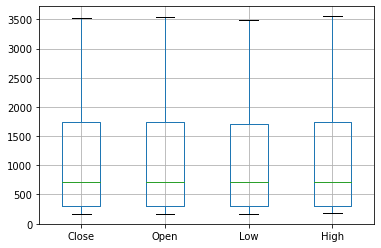

In [ ]:
amzn_data.boxplot(column=['Close','Open','Low','High'])
plt.show()

there is no outlier in all the variables.

**correlation**

In [ ]:
amzn_data[['Low','Volume','High']].corr()

Low    Volume      High
Low     1.000000  0.053753  0.999801
Volume  0.053753  1.000000  0.063775
High    0.999801  0.063775  1.000000

correlation between 'low' and 'volume' is 0.053 and correlation between 'high' and 'volume' is 0.063 from this we can conclude that there is a **positive relationship** between measured factors.
(>0.05 positive)

In [ ]:
amzn_data[['Open','Volume','Close']].corr()

Open    Volume     Close
Open    1.000000  0.059707  0.999710
Volume  0.059707  1.000000  0.058536
Close   0.999710  0.058536  1.000000

correlation between 'open' and 'volume' is 0.059 and correlation between 'close' and 'volume' is 0.058 from this we can conclude that there is a **positive relationship** between measured factors. (>0.05 positive)

# Data visualization

### Scatter pots to find realtion between low, high and volume.


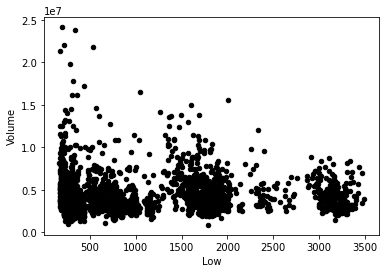

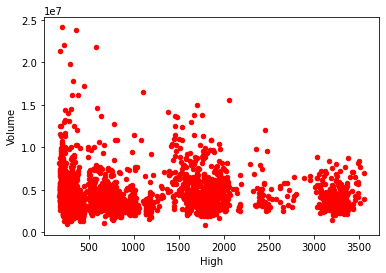

In [ ]:
amzn_data.plot.scatter(x='Low',y='Volume', color='black')
plt.show()
amzn_data.plot.scatter(x='High',y='Volume', color='red')
plt.show()

from the above plots we can understood that more the rate of shares are in lesser volume and less rate of shares are in more volume.

### Line graph to represent the pattern of close price and open price of shares.

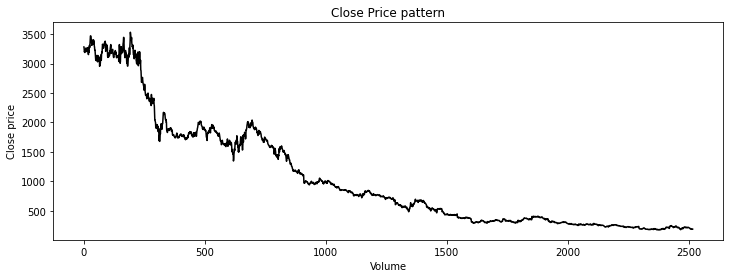

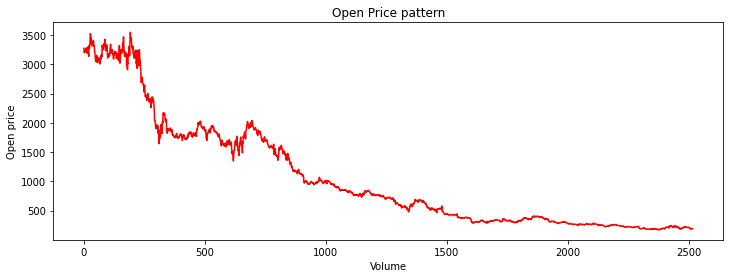

In [ ]:
plt.figure(figsize=(12,4))
plt.title("Close Price pattern")
plt.plot(amzn_data['Close'], color='black')
plt.xlabel('Volume')
plt.ylabel('Close price')
plt.show()

plt.figure(figsize=(12,4))
plt.title("Open Price pattern")
plt.plot(amzn_data['Open'], color='red')
plt.xlabel('Volume')
plt.ylabel('Open price')
plt.show()

both open price and close price pattern seems to be same.  

# Volume trend

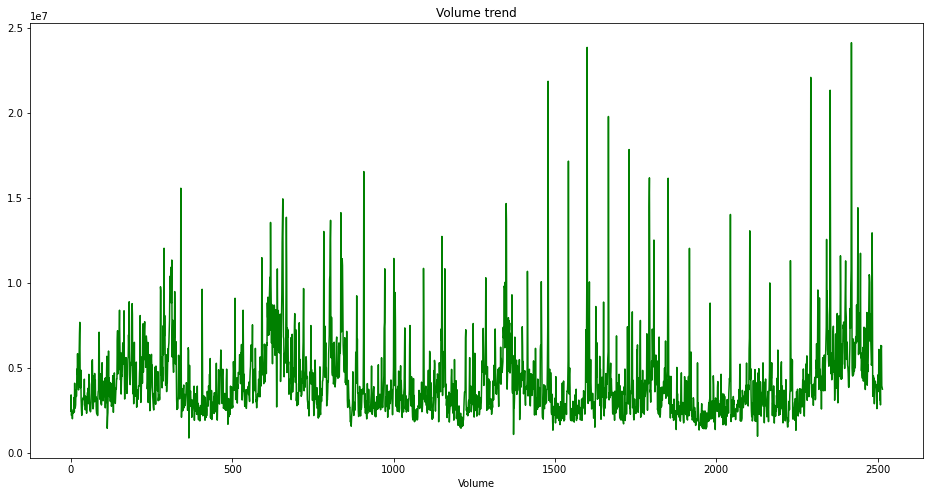

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Volume trend")
plt.plot(amzn_data['Volume'], color='green')
plt.xlabel('Volume')
plt.show()

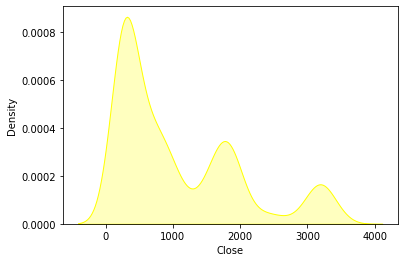

In [ ]:
sns.kdeplot(data= amzn_data['Close'], shade= True, color='yellow')

Kernal dimension estimate 

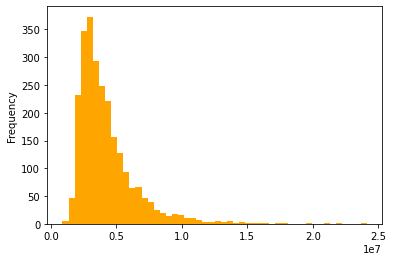

In [ ]:
amzn_data['Volume'].plot(bins=50, kind= 'hist',color='orange')

A histogram of random numbers, and the data are equally distribute into 50 bins.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f366d066d50>,
      dtype=object)

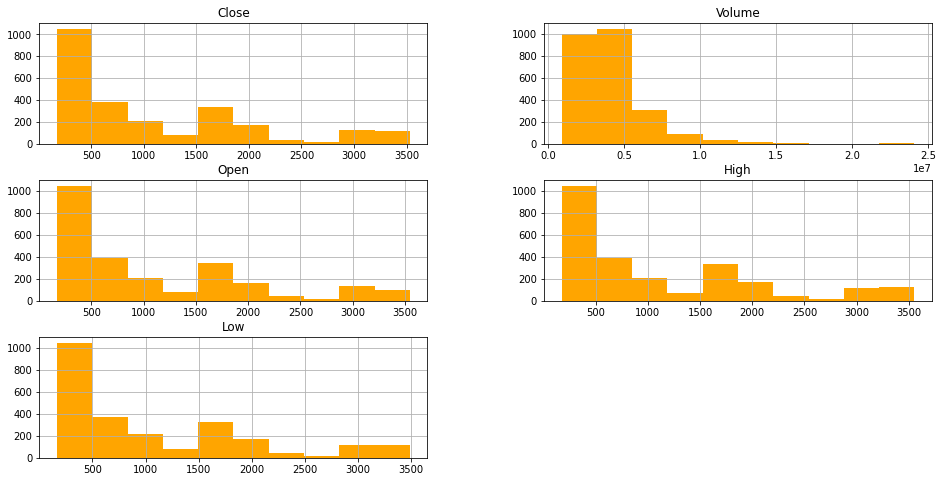

In [ ]:
amzn_data.hist(bins=10, figsize=(16,8), color='orange')

# News Article files 


In [ ]:
!pip install nltk
!pip install wordcloud

In [ ]:
!pip install sklearn

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
from nltk import word_tokenize
from collections import Counter
from wordcloud import wordcloud

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import logistic_regression_path
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize']=14,6
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [ ]:
from google.colab import files
uploaded= files.upload()



Saving 2015.csv to 2015.csv
Saving 2016.csv to 2016.csv
Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv
Saving 2020.csv to 2020.csv
Saving 2021.csv to 2021.csv


In [ ]:
import io
df2015=pd.read_csv(io.BytesIO(uploaded['2015.csv']))
df2016=pd.read_csv(io.BytesIO(uploaded['2016.csv']))
df2017=pd.read_csv(io.BytesIO(uploaded['2017.csv']))
df2018=pd.read_csv(io.BytesIO(uploaded['2018.csv']))
df2019=pd.read_csv(io.BytesIO(uploaded['2019.csv']))
df2020=pd.read_csv(io.BytesIO(uploaded['2020.csv']))
df2021=pd.read_csv(io.BytesIO(uploaded['2021.csv']))

In [ ]:
amzn_his_data= pd.concat([df2015,df2016,df2017,df2018,df2019,df2020,df2021])

In [ ]:
del amzn_his_data['Date ']

In [ ]:
amzn_his_data.head()

Date                                            Heading
0  02-01-2015  What to expect from Apple in 2015 beyond its s...
1  05-01-2015  SIM-free iPhone 6, 6 Plus reportedly debuting ...
2  06-01-2015  Technology Transforming Cars Into "Phones On W...
3  07-01-2015  Apple issues fourth developer beta of OS X 10....
4  08-01-2015  Apple company recalls 2014 shipments after lin...

In [ ]:
amzn_his_data.tail()

Date                                            Heading
122  19-06-2021  Best pre-Prime Day smartwatch deals on Apple W...
123  20-06-2021  iPhone 13 rumors: As Apple's fall event gets c...
124  21-06-2021  Apple is shortening new free TV Plus trials fr...
125  22-06-2021  Google likely to soon face antitrust claims ov...
126  23-06-2021  French court sets date in Apple case over App ...

In [ ]:
amzn_his_data['Date']=pd.to_datetime(amzn_his_data['Date'])

In [ ]:
amzn_his_data.dtypes

Date       datetime64[ns]
Heading            object
dtype: object

In [ ]:
amzn_his_data['Heading']=amzn_his_data['Heading'].str.lower()

# Data preprocessing

In [ ]:
all_heading= " ".join(amzn_his_data['Heading'])
all_heading

'what to expect from apple in 2015 beyond its smartwatch amazon&quot;s latest kindle unlimited program irks authors apple inc. (aapl) gets an upward revision from angus could palm-branded phones ever make a comeback? here&quot;s another look at apple&quot;s own ibeacon stock update (nyse:ibm): ibm, apple partnership will bear sweet fruit for both stocks can the &quot;internet of things&quot; help broadcom dominate qualcomm? rare photos shed light on steve jobs, and a young silicon valley apple&quot;s ipad shipments in 2014 could be 8% below 2013 rf micro devices, inc. (rfmd) and triquint semiconductor (tqnt) merged into qorvo inc (qrvo) apple study: only 5% of u.s. iphone users want apple watch why apple inc. (aapl) stock took a small hit going into 2015 apple sued over shrinking free space after ios 8 is installed apple&quot;s app of the week, "icycle: on thin ice," can be downloaded for free taiwan clears apple inc. and other companies for data violation company update: apple inc (na

In [ ]:
freq_data= FreqDist(all_heading.split())
freq_data 

FreqDist({'what': 878,
          'to': 9599,
          'expect': 143,
          'from': 1347,
          'apple': 21401,
          'in': 7414,
          '2015': 166,
          'beyond': 69,
          'its': 1084,
          'smartwatch': 111,
          'amazon&quot;s': 32,
          'latest': 207,
          'kindle': 2,
          'unlimited': 9,
          'program': 95,
          'irks': 1,
          'authors': 2,
          'inc.': 5698,
          '(aapl)': 2686,
          'gets': 218,
          'an': 803,
          'upward': 7,
          'revision': 4,
          'angus': 1,
          'could': 901,
          'palm-branded': 1,
          'phones': 92,
          'ever': 69,
          'make': 293,
          'a': 4455,
          'comeback?': 6,
          'here&quot;s': 464,
          'another': 156,
          'look': 181,
          'at': 1497,
          'apple&quot;s': 3149,
          'own': 122,
          'ibeacon': 4,
          'stock': 2836,
          'update': 642,
          '(nyse:ibm):

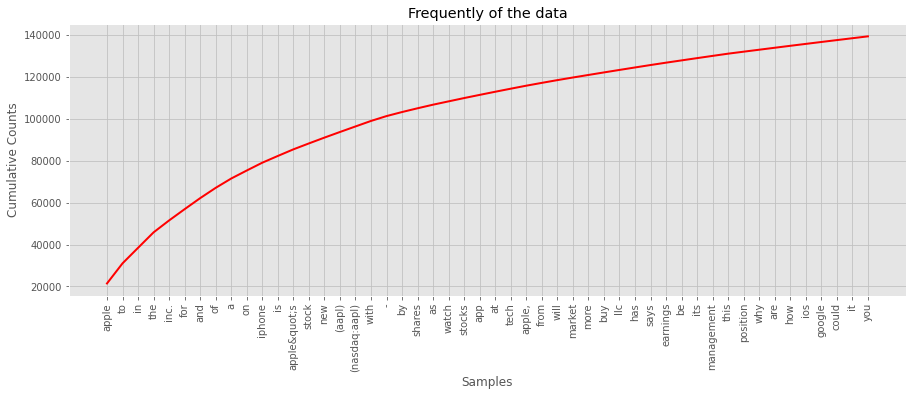

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Frequently of the data")
freq_data.plot(50, cumulative= True, color= 'red')

In [ ]:
eng_stopwords=set(stopwords.words('english'))
no_stopwords=" "
for word in all_heading.split():
  if word not in eng_stopwords:
      no_stopwords += word + " "
no_stopwords

' expect apple 2015 beyond smartwatch amazon&quot;s latest kindle unlimited program irks authors apple inc. (aapl) gets upward revision angus could palm-branded phones ever make comeback? here&quot;s another look apple&quot;s ibeacon stock update (nyse:ibm): ibm, apple partnership bear sweet fruit stocks &quot;internet things&quot; help broadcom dominate qualcomm? rare photos shed light steve jobs, young silicon valley apple&quot;s ipad shipments 2014 could 8% 2013 rf micro devices, inc. (rfmd) triquint semiconductor (tqnt) merged qorvo inc (qrvo) apple study: 5% u.s. iphone users want apple watch apple inc. (aapl) stock took small hit going 2015 apple sued shrinking free space ios 8 installed apple&quot;s app week, "icycle: thin ice," downloaded free taiwan clears apple inc. companies data violation company update: apple inc (nasdaq:aapl) - 5 new year resolutions apple&quot;s tim cook alphadigits top rated apps december 2014 5 new year resolutions apple&quot;s tim cook tech today: new

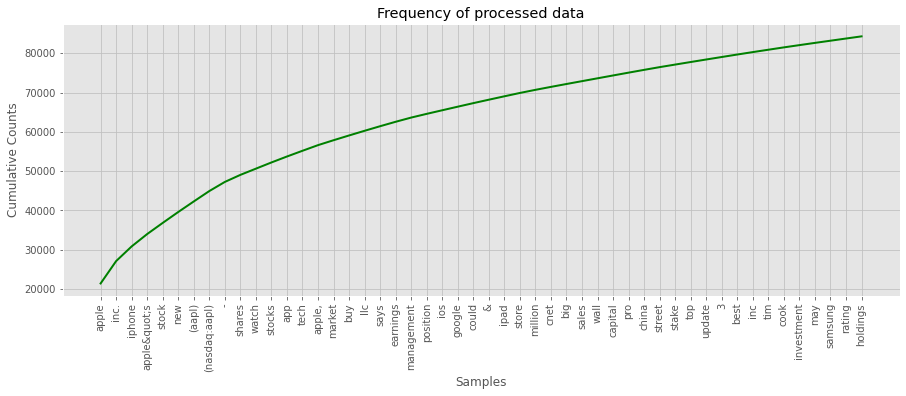

In [ ]:
fig2= FreqDist(no_stopwords.split())
plt.figure(figsize=(15,5))
plt.title("Frequency of processed data")
fig2.plot(50, cumulative= True, color= 'green')

**identifying special characters**

In [ ]:
spl_char= amzn_his_data['Heading'].apply(lambda review: [char for char in list(review) if not char.isalnum() and char != ' '])
flat_list= [item for sublist in spl_char for item in sublist]
set(flat_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '=',
 '>',
 '?',
 '@',
 '[',
 ']'}

**No of tokens**

In [ ]:
from nltk  import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
token_lists= [word_tokenize(each) for each in amzn_his_data['Heading']]
tokens= [item for sublist in token_lists for item in sublist]
print("No of tokens", len(set(tokens)))

No of tokens 22355


**Stopwords finding**

In [ ]:
stopwords.words()
eng_stopwords= stopwords.words('english')
eng_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Merging historical data and news articles

In [ ]:
amzn_eda= pd.merge(amzn_data,amzn_his_data, on=['Date'], how= 'outer')
amzn_eda.head()


Date  ...                                            Heading
0 2021-06-09  ...                                                NaN
1 2021-06-08  ...                                                NaN
2 2021-06-07  ...                                                NaN
3 2021-06-04  ...  this simple stock market strategy is winning s...
4 2021-06-03  ...                                                NaN

[5 rows x 7 columns]

In [ ]:
amzn_eda.tail()

Date  Close  ...  Low                                            Heading
2826 2021-06-19    NaN  ...  NaN  best pre-prime day smartwatch deals on apple w...
2827 2021-06-20    NaN  ...  NaN  iphone 13 rumors: as apple's fall event gets c...
2828 2021-06-21    NaN  ...  NaN  apple is shortening new free tv plus trials fr...
2829 2021-06-22    NaN  ...  NaN  google likely to soon face antitrust claims ov...
2830 2021-06-23    NaN  ...  NaN  french court sets date in apple case over app ...

[5 rows x 7 columns]

In [ ]:
amzn_eda.describe()

Close        Volume         Open         High          Low
count  2533.000000  2.533000e+03  2533.000000  2533.000000  2533.000000
mean   1073.590500  4.202192e+06  1074.084557  1085.290177  1061.333931
std     935.605628  2.289975e+06   936.770469   947.154201   924.537718
min     173.100000  8.813370e+05   169.620000   174.550000   166.970000
25%     307.320000  2.736705e+06   307.270000   311.000000   303.840000
50%     722.080000  3.612510e+06   720.970000   726.430000   714.210000
75%    1743.070000  4.933434e+06  1743.000000  1760.000000  1725.110000
max    3531.450000  2.412413e+07  3547.000000  3554.000000  3486.685000

In [ ]:
amzn_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 0 to 2830
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2831 non-null   datetime64[ns]
 1   Close    2533 non-null   float64       
 2   Volume   2533 non-null   float64       
 3   Open     2533 non-null   float64       
 4   High     2533 non-null   float64       
 5   Low      2533 non-null   float64       
 6   Heading  691 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 176.9+ KB


In [ ]:
amzn_eda.shape

(2831, 7)

In [ ]:
amzn_eda.isnull().sum()

Date          0
Close       298
Volume      298
Open        298
High        298
Low         298
Heading    2140
dtype: int64

# Data preprocessing

In [ ]:
amzn_eda['Close']= amzn_eda['Close'].fillna(amzn_eda['Close'].mean())
amzn_eda['Open']= amzn_eda['Open'].fillna(amzn_eda['Open'].mean())
amzn_eda['Low']= amzn_eda['Low'].fillna(amzn_eda['Low'].mean())
amzn_eda['High']= amzn_eda['High'].fillna(amzn_eda['High'].mean())
amzn_eda['Volume']= amzn_eda['Volume'].fillna(amzn_eda['Volume'].mean())
amzn_eda['Heading']= amzn_eda['Heading'].fillna(' ')

In [ ]:
amzn_eda.tail()

Date  ...                                            Heading
2826 2021-06-19  ...  best pre-prime day smartwatch deals on apple w...
2827 2021-06-20  ...  iphone 13 rumors: as apple's fall event gets c...
2828 2021-06-21  ...  apple is shortening new free tv plus trials fr...
2829 2021-06-22  ...  google likely to soon face antitrust claims ov...
2830 2021-06-23  ...  french court sets date in apple case over app ...

[5 rows x 7 columns]

In [ ]:
duplicate= amzn_eda.duplicated()
print(duplicate.sum())
amzn_eda[duplicate]

21


Date  ...                                            Heading
27   2021-05-03  ...  2 cheap stocks under $25 to buy that shrugged ...
50   2021-03-31  ...  apple pay hackers using stolen credit card dat...
52   2021-03-30  ...  review: epos gtw 270 hybrid is a few steps awa...
54   2021-03-29  ...  apple&quot;s independent repair program is exp...
59   2021-03-23  ...  55 influential business and leadership books t...
61   2021-03-22  ...  is a virtual reality headset controlled direct...
65   2021-03-17  ...  apple event 2021 launch: airpods 3, ipad mini ...
75   2021-03-04  ...  fake app on apple&quot;s app store scams user ...
77   2021-03-03  ...  apple m1 macbook pro amazon sale: $100 off on ...
118  2021-01-04  ...  apple&quot;s tim cook says voting &quot;ought ...
394  2019-11-29  ...  update 1-apple &quot;taking a deeper look&quot...
398  2019-11-25  ...  3 blue-chip tech stocks to buy right now with ...
406  2019-11-18  ...  mgg 789: i got caught ... learning! 3 dow stoc...
409  2019-11-14  ...  apple hires trump donor as lobbyist in hopes o...
2710 2019-11-16  ...  warren buffett&quot;s berkshire hathaway trims...
2712 2019-11-17  ...  trump to tour apple&quot;s austin manufacturin...
2714 2019-11-24  ...  better buy: universal display vs. applied mate...
2796 2021-04-03  ...  nasdaq ends sharply lower after powell comment...
2798 2021-11-03  ...  go listen to spotify&quot;s podcast about itse...
2800 2021-12-03  ...  how to cancel an apple one subscription once y...
2802 2021-03-20  ...  brazil regulator fines apple $2 million for no...

[21 rows x 7 columns]

**Plot after combining data**


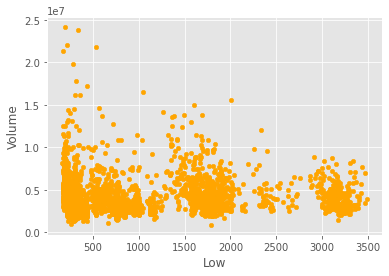

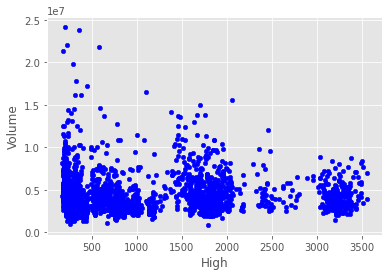

In [ ]:
amzn_data.plot.scatter(x='Low',y='Volume', color='orange')
plt.show()
amzn_data.plot.scatter(x='High',y='Volume', color='blue')
plt.show()